In [145]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

In [160]:
def save_traj(file_name, save_name, df, r_xyzs, p_xyzs):
    atom_to_symbol = {6:"C", 7:"N", 8:"O", 1:"H"}

    with open(file_name, "rb") as f:
        data = pickle.load(f)
    for i,d in enumerate(data):
        index = np.array(df.AAM == d.smiles).nonzero()[0][0]
        atom_type = [atom_to_symbol[a] for a in d.atom_type.tolist()]
        pos_gen = d.pos_gen[:,:len(atom_type),:].numpy()
        r_xyz = pos_from_xyz(r_xyzs[index])
        p_xyz = pos_from_xyz(p_xyzs[index])
        np.savez(f"{save_name}_{i}", 
                 pos_gen=pos_gen, 
                 atom_type=atom_type, 
                 pos=d.pos.numpy(),
                 r_pos = r_xyz,
                 p_pos = p_xyz)
        
def pos_from_xyz(xyz):
    return np.array([[float(v) for v in l.split()[1:]] for l in xyz.strip().split("\n")[2:]])

In [161]:
df = pd.read_csv("data/TS/b97d3/raw_data/b97d3_fwd_rev_chemprop.csv")
with open("data/TS/b97d3/raw_data/b97d3_reactants.txt","r") as f:
    r_xyzs = "".join(f.readlines()).split("$$$$$\n")
with open("data/TS/b97d3/raw_data/b97d3_products.txt","r") as f:
    p_xyzs = "".join(f.readlines()).split("$$$$$\n")


In [153]:
save_traj("logs/ts_dv3_newedge_nolocal___dv3_newedge_nolocal/traj_1_372_62.pkl","traj_1_372_62", df, r_xyzs, p_xyzs)

In [114]:
score_base = np.load("score_base.npz")
score_nolocal = np.load("score_nolocal.npz")

In [115]:
mae_base = score_base["mae"]
mae_nolocal = score_nolocal["mae"]
dmae_base = score_base["dm_mae"]
dmae_nolocal = score_nolocal["dm_mae"]

rmsd_nolocal = score_nolocal["rmsd"]
drmsd_nolocal = score_nolocal["dm_rmsd"]

In [29]:
print(mae_nolocal.mean(), rmsd_nolocal.mean())
print(dmae_nolocal.mean(), drmsd_nolocal.mean())

0.6755486044177953 0.892384335686473
0.22820824323124042 0.40510694512887907


In [120]:
index = (mae_base.mean(-1) > 10).nonzero()[:100][0]
import pickle
test_data = "/home/ksh/MolDiff/GeoDiff/data/TS/b97d3/test_data.pkl"
with open(test_data, "rb") as f:
    test_data = pickle.load(f)

In [122]:
new_data = [test_data[i] for i in index]
with open("data/TS/b97d3/abnormal_test_100.pkl","wb") as f:
    pickle.dump(new_data, f)

In [34]:
print((dmae_base.mean(axis=-1)[mae_base.mean(axis=-1) < 1.5]).mean(), mae_base.mean(axis=-1)[mae_base.mean(axis=-1)<1.5].mean())
print((dmae_nolocal.mean(axis=-1)[mae_base.mean(axis=-1) < 1.5]).mean(), mae_nolocal.mean(axis=-1)[mae_base.mean(axis=-1)<1.5].mean())

0.1995217858028047 0.6075973657310495
0.1981016322225553 0.5925819239075621


In [35]:
dmae_nolocal.mean()

0.22820824323124042

In [135]:
print(mae_nolocal.mean(-1)[1], dmae_nolocal.mean(-1)[1])

0.6961346908207597 0.23137401014107484


In [126]:
mae_nolocal.mean(-1)[372], dmae_nolocal.mean(-1)[372]

(0.03333499611413028, 0.008955345615640408)

In [133]:
mae_nolocal.mean(-1)[62], dmae_nolocal.mean(-1)[62]

(1.1994622692290093, 0.41093404568438663)

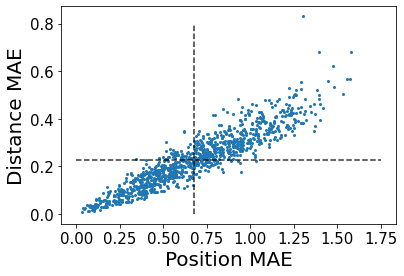

In [132]:
plt.scatter(mae_nolocal.mean(-1), dmae_nolocal.mean(-1),s=4)
plt.xlabel("Position MAE",size=20)
plt.ylabel("Distance MAE",size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.vlines(mae_nolocal.mean(), ymin=0, ymax = 0.8, color="k", linestyle="--", alpha=0.8)
plt.hlines(dmae_nolocal.mean(), xmin=0, xmax = 1.75, color="k", linestyle="--", alpha=0.8)

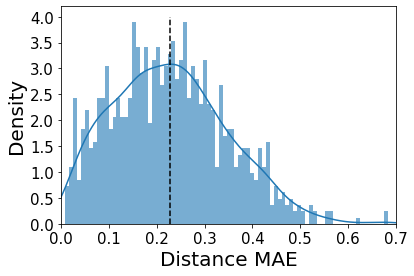

In [98]:
x = dmae_nolocal.mean(axis=-1)
sns.kdeplot(x)
plt.xlabel("Distance MAE",size=20)
plt.ylabel("Density",size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim((0,0.7))
plt.vlines(x.mean(), ymin=0.0, ymax=4.0, color="k", linestyle="--")
a = plt.hist(x,bins=100,density=True, color="tab:blue",alpha=0.6)

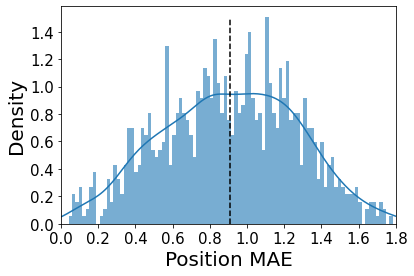

In [105]:
x = mae_nolocal.mean(axis=-1)
sns.kdeplot(x)
plt.xlabel("Position MAE",size=20)
plt.ylabel("Density",size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim((0,1.8))
plt.vlines(x.mean(), ymin=0.0, ymax=1.5, color="k", linestyle="--")
a = plt.hist(x,bins=100,density=True, color="tab:blue",alpha=0.6)

0.43 0.996
0.6075973657310495 0.6719866615850603


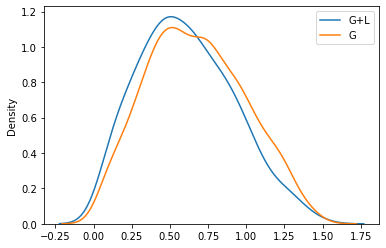

In [124]:
x = mae_base.mean(axis=-1)
y = mae_nolocal.mean(axis=-1)
sns.kdeplot(x[x < 1.5])
sns.kdeplot(y[y < 1.5])
print((x<1.5).sum()/len(x),(y<1.5).sum()/len(y))
print((x[x<1.5]).mean(), (y[y<1.5]).mean())
plt.legend(["G+L","G"])

0.43 0.996


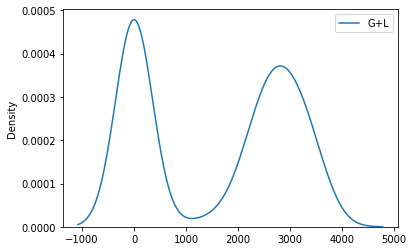

In [125]:
x = mae_base.mean(axis=-1)
y = mae_nolocal.mean(axis=-1)
sns.kdeplot(x)
#sns.kdeplot(y)
print((x<1.5).sum()/len(x),(y<1.5).sum()/len(y))
plt.legend(["G+L","G"])

In [135]:
idx = (mae_nolocal.mean(-1) > 1.0) * (dmae_nolocal.mean(-1) < 0.1)
idx.nonzero()

(array([], dtype=int64),)

In [144]:
index_bad = (mae_base.mean(-1) > 3).nonzero()[0]
index_good = (mae_base.mean(-1) < 1.5).nonzero()[0]

In [146]:
len(index_bad), len(index_good)

(570, 430)

In [148]:
with open("data/TS/b97d3/random_split/test_data.pkl", "rb") as f:
    test_set = pickle.load(f)

In [149]:
test_bad = [test_set[i] for i in index_bad]
test_good = [test_set[i] for i in index_good]
with open("data/TS/b97d3/test_bad.pkl","wb") as f:
    pickle.dump(test_bad, f)
with open("data/TS/b97d3/test_good.pkl","wb") as f:
    pickle.dump(test_good, f)

In [155]:
cnt = 0
for d in test_bad:
    if "." in d.smiles:
        cnt += 1
print(cnt)

cnt = 0
for d in test_good:
    if "." in d.smiles:
        cnt += 1
print(cnt)

323
0


0.5666666666666667